In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [104]:
df = pd.read_csv('the_office_series.csv')
df.rename(columns=({'Unnamed: 0':'Episode'}), inplace=True)

df['Date'] = pd.to_datetime(df['Date'])
df['GuestStars'] = df['GuestStars'].astype(str)

df.head()

,Episode,Season,EpisodeTitle,About,Ratings,Votes,Viewership,Duration,Date,GuestStars,Director,Writers
0,0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.2,23,2005-03-24,nan,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels
1,1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.0,23,2005-03-29,nan,Ken Kwapis,B. J. Novak
2,2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.8,22,2005-04-05,nan,Ken Whittingham,Paul Lieberstein
3,3,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,3915,5.4,23,2005-04-12,nan,Bryan Gordon,Michael Schur
4,4,1,Basketball,Michael and his staff challenge the warehouse ...,8.4,4294,5.0,23,2005-04-19,nan,Greg Daniels,Greg Daniels


In [105]:
df.describe()

,Episode,Season,Ratings,Votes,Viewership,Duration
count,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000
mean,93.500000,5.468085,8.237234,2838.228723,7.246330,27.053191
std,54.415071,2.386245,0.589930,1063.165290,2.066012,6.937254
min,0.000000,1.000000,6.600000,1832.000000,3.250000,19.000000
25%,46.750000,3.000000,7.800000,2187.750000,5.990000,22.000000
50%,93.500000,6.000000,8.200000,2614.000000,7.535000,23.000000
75%,140.250000,7.250000,8.600000,3144.250000,8.425000,30.000000
max,187.000000,9.000000,9.800000,10515.000000,22.910000,60.000000


In [106]:
new_rating = []
guest = []

for index, rows in df.iterrows():
    if rows['Ratings'] < 7.8:
        new_rating.append('red')
    elif (rows['Ratings'] < 8.2):
        new_rating.append('orange')
    elif rows['Ratings'] < 8.6:
        new_rating.append('lightgreen')
    else:
        new_rating.append('darkgreen')

for index, rows in df.iterrows():
    if rows['GuestStars'] == 'nan':
        guest.append(25)
    else:
        guest.append(250)

In [107]:
df['colors'] = new_rating
df['size'] = guest

In [203]:
df.head(1)

,Episode,Season,EpisodeTitle,About,Ratings,Votes,Viewership,Duration,Date,GuestStars,Director,Writers,colors,size
0,0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.2,23,2005-03-24,nan,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels,red,25


In [184]:
df[df['Viewership'] == 22.91]

,Episode,Season,EpisodeTitle,About,Ratings,Votes,Viewership,Duration,Date,GuestStars,Director,Writers,colors,size
77,77,5,Stress Relief,Dwight's too-realistic fire alarm gives Stanle...,9.7,8170,22.91,60,2009-02-01,"Cloris Leachman, Jack Black, Jessica Alba",Jeffrey Blitz,Paul Lieberstein,darkgreen,250


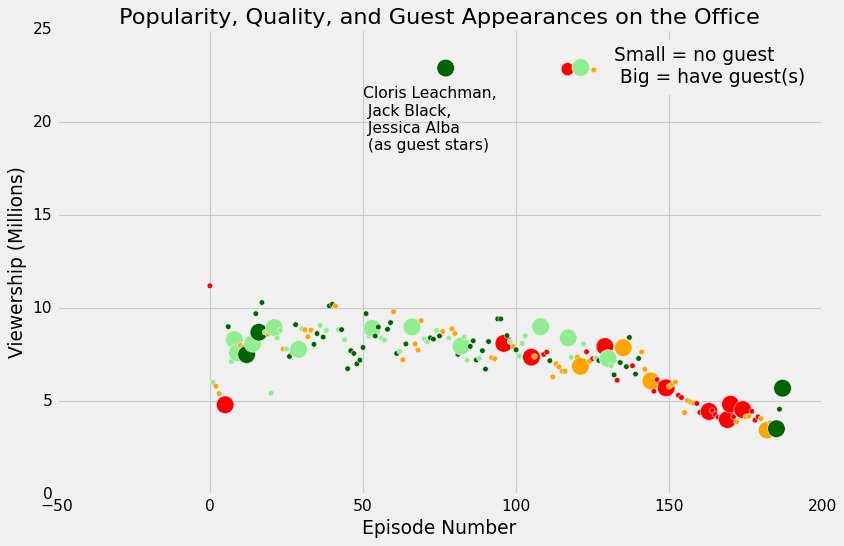

In [202]:
fig, ax = plt.subplots(figsize=(11,7))
plt.style.use('fivethirtyeight')
plt.grid(True)
ax.scatter(x=df['Episode'], y=df['Viewership'], c=df['colors'], s=df['size'], label='Small = no guest \n Big = have guest(s)')

plt.annotate('Cloris Leachman,\n Jack Black,\n Jessica Alba \n (as guest stars)', [50,18.5])
plt.title("Popularity, Quality, and Guest Appearances on the Office")
plt.xlabel("Episode Number")
plt.ylabel("Viewership (Millions)")
plt.legend()

plt.show()